# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

# Importing tools:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the plotting libs
import holoviews as hv
from holoviews.operation.datashader import datashade, inspect, rasterize
# colour maps lib
import colorcet as cc
# a lib for plotting a large dataset
import datashader as ds
from datashader.utils import lnglat_to_meters
# panel lib for widgets
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")
Traffic_volumn_data = pd.read_csv("TrafficVolume.csv")

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
1  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
2  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
3  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
4  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
5  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
6  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
7  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
8  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   
9  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   

  RadioConnectionType       Country RadioNetworkGeneration RadioOperatorName  \
0              Mobile  Saudi Arabia                     4G        Operator C   
1              Mobile  Saudi Arabia                     4G        Operator C   
2              Mobile  Saudi Arabia                     3G        Operator C   
3              Mobile  Saudi Arabia                     3G        Operator C   
4              Mobile  Saudi Arabia                     4G        Operator C   
5              Mobile  Saudi Arabia                     4G        Operator C   
6              Mobile  Saudi Arabia                     3G        Operator C   
7              Mobile  Saudi Arabia                     3G        Operator C   
8              Mobile  Saudi Arabia                     2G        Operator C   
9              Mobile  Saudi Arabia                     2G        Operator C   

         RSRP RadioMobileDataEnabled DeviceManufacturer           DeviceName  
0  2147483647                Enabled                HTC                D728W  
1  2147483647                Enabled                HTC  Desire 728 Dual Sim  
2  2147483647                Enabled                HTC                D728W  
3  2147483647                Enabled                HTC  Desire 728 Dual Sim  
4  2147483647                Enabled                HTC                D728W  
5  2147483647                Enabled                HTC  Desire 728 Dual Sim  
6  2147483647                Enabled                HTC                D728W  
7  2147483647                Enabled                HTC  Desire 728 Dual Sim  
8  2147483647                Enabled                HTC                D728W  
9  2147483647                Enabled                HTC  Desire 728 Dual Sim

In [4]:
RSRP_data.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
1805408  2019-11-04 09:43:28.999 +0300         24.779646          46.681885   
85340    2019-11-02 17:40:55.306 +0300         24.697477          46.771675   
446852   2019-11-02 15:49:44.026 +0300         24.807339          46.769924   
1744939  2019-11-03 17:57:58.018 +0300         24.592466          46.715244   
1850966  2019-11-03 10:10:52.000 +0300         24.839895          46.553040   
2479719  2019-11-04 23:00:54.000 +0300         24.613443          46.680790   
1622226  2019-11-04 21:03:26.000 +0300         24.692333          46.693485   
1965855  2019-11-03 14:34:55.000 +0300         24.780949          46.800476   
58090    2019-11-02 01:16:57.000 +0300         24.840294          46.748016   
1763776  2019-11-03 22:15:00.001 +0300         24.582180          46.874184   
875699   2019-11-02 23:46:15.001 +0300         24.758348          46.735430   
908856   2019-11-02 11:58:29.032 +0300         24.773762          46.834763   
1658874  2019-11-04 11:44:45.500 +0300         24.683159          46.726660   
1644059  2019-11-02 09:22:31.924 +0300         24.829655          46.811550   
732465   2019-11-02 10:18:37.001 +0300         24.794207          46.819780   
119138   2019-11-02 01:48:44.592 +0300         24.555336          46.591133   
2407826  2019-11-04 18:16:53.000 +0300         24.793730          46.631012   
505076   2019-11-03 07:11:32.023 +0300         24.556887          46.674810   
835912   2019-11-02 22:54:28.000 +0300         24.757456          46.685600   
131989   2019-11-02 20:25:12.017 +0300         24.593615          46.713715   

        RadioConnectionType       Country RadioNetworkGeneration  \
1805408              Mobile  Saudi Arabia                     4G   
85340                Mobile  Saudi Arabia                     3G   
446852               Mobile  Saudi Arabia                     3G   
1744939              Mobile  Saudi Arabia                     4G   
1850966              Mobile  Saudi Arabia                     4G   
2479719              Mobile  Saudi Arabia                     3G   
1622226              Mobile  Saudi Arabia                     4G   
1965855              Mobile  Saudi Arabia                     4G   
58090                Mobile  Saudi Arabia                     4G   
1763776              Mobile  Saudi Arabia                     3G   
875699               Mobile  Saudi Arabia                     3G   
908856               Mobile  Saudi Arabia                     4G   
1658874              Mobile  Saudi Arabia                     4G   
1644059              Mobile  Saudi Arabia                     4G   
732465               Mobile  Saudi Arabia                     4G   
119138               Mobile  Saudi Arabia                     4G   
2407826              Mobile  Saudi Arabia                     4G   
505076               Mobile  Saudi Arabia                     3G   
835912               Mobile  Saudi Arabia                     4G   
131989               Mobile  Saudi Arabia                     4G   

        RadioOperatorName        RSRP RadioMobileDataEnabled  \
1805408        Operator A         -89                Enabled   
85340          Operator A  2147483647                Enabled   
446852         Operator B  2147483647                Enabled   
1744939        Operator A         -75                Enabled   
1850966        Operator A         -94                Enabled   
2479719        Operator A  2147483647                Enabled   
1622226        Operator A         -70                Enabled   
1965855        Operator C         -94                Enabled   
58090          Operator C         -86                Enabled   
1763776        Operator A  2147483647                Enabled   
875699         Operator A  2147483647                Enabled   
908856         Operator B         -81                Enabled   
1658874        Operator A  2147483647                Enabled   
1644059        Operator A         -71       

In [5]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


In [6]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [7]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [8]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [9]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [10]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [11]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [12]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [13]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

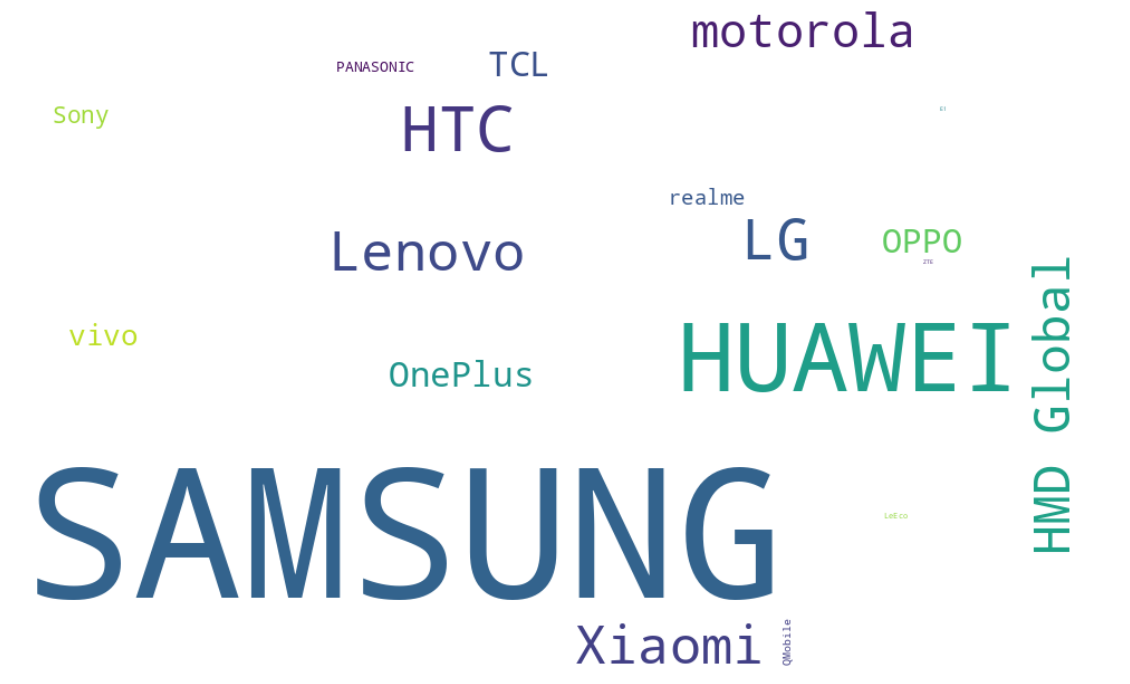

In [14]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

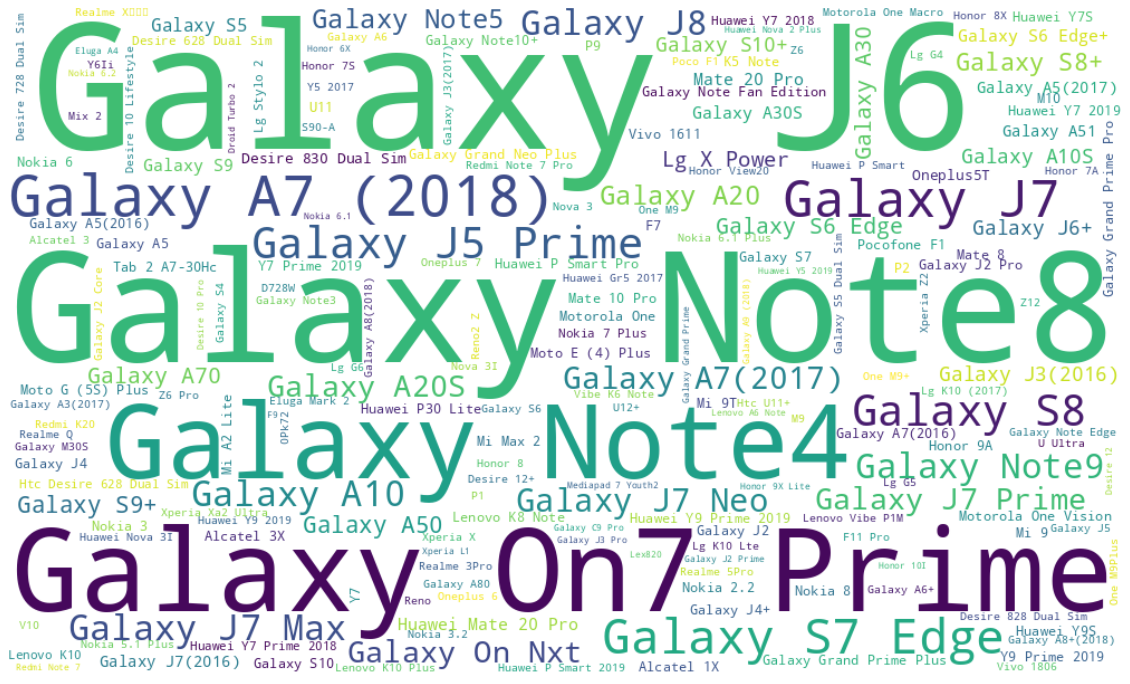

In [15]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted ti the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [16]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [17]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     object             
 4   RadioNetworkGeneration  object             
 5   RadioOperatorName       object             
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  object             
 8   DeviceManufacturer      object             
 9   DeviceName              object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 207.9+ MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [18]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [19]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [20]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 2147483647]

Timestamp  LocationLatitude  LocationLongitude  \
0       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
1       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
2       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
3       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
4       2019-11-01 21:11:26.822000+00:00         24.540540          46.784737   
...                                  ...               ...                ...   
2724318        2019-11-02 15:59:42+00:00         24.723953          46.669780   
2725269 2019-11-03 08:35:23.171000+00:00         24.812200          46.752940   
2725270 2019-11-03 08:35:32.550000+00:00         24.812200          46.752940   
2725316 2019-11-03 13:50:06.017000+00:00         24.812235          46.752796   
2725325 2019-11-03 14:25:19.527000+00:00         24.812230          46.752800   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
0                    Mobile                     4G        Operator C   
1                    Mobile                     4G        Operator C   
2                    Mobile                     3G        Operator C   
3                    Mobile                     3G        Operator C   
4                    Mobile                     4G        Operator C   
...                     ...                    ...               ...   
2724318              Mobile                     4G        Operator C   
2725269              Mobile                     3G        Operator A   
2725270              Mobile                     4G        Operator A   
2725316              Mobile                     3G        Operator A   
2725325              Mobile                     3G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
0        2147483647                Enabled                HTC   
1        2147483647                Enabled                HTC   
2        2147483647                Enabled                HTC   
3        2147483647                Enabled                HTC   
4        2147483647                Enabled                HTC   
...             ...                    ...                ...   
2724318  2147483647                Enabled            SAMSUNG   
2725269  2147483647                Enabled            SAMSUNG   
2725270  2147483647                Enabled            SAMSUNG   
2725316  2147483647                Enabled            SAMSUNG   
2725325  2147483647                Enabled            SAMSUNG   

                  DeviceName  
0                      D728W  
1        Desire 728 Dual Sim  
2                      D728W  
3        Desire 728 Dual Sim  
4                      D728W  
...                      ...  
2724318        Galaxy On Nxt  
2725269          Galaxy A20S  
2725270          Galaxy A20S  
2725316          Galaxy A20S  
2725325          Galaxy A20S  

[643705 rows x 10 columns]

***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

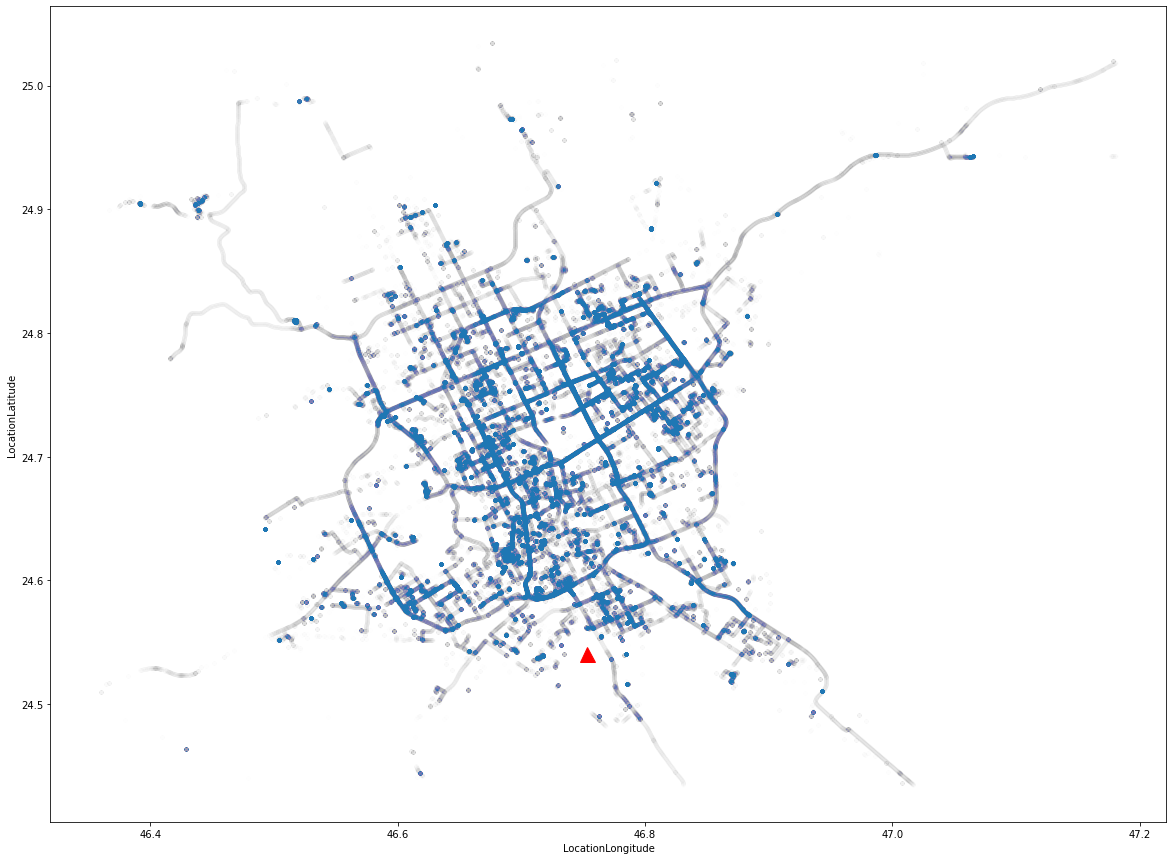

In [21]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

In [22]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
RSRP_data_valid.sample(40)

Timestamp  LocationLatitude  LocationLongitude  \
1644009 2019-11-02 06:19:41.821000+00:00         24.809624          46.763176   
2022679 2019-11-04 08:04:14.065000+00:00         24.553928          46.702020   
731238  2019-11-03 07:56:42.463000+00:00         24.685972          46.705044   
1726435 2019-11-03 06:54:25.828000+00:00         24.751463          46.686867   
2541782 2019-11-04 18:54:06.034000+00:00         24.761900          46.625843   
919365         2019-11-02 15:01:28+00:00         24.836042          46.769096   
65715   2019-11-02 04:31:16.007000+00:00         24.816920          46.732662   
2628549 2019-11-03 12:26:48.001000+00:00         24.627153          46.703053   
2577303 2019-11-04 19:12:06.022000+00:00         24.592386          46.715640   
1684231 2019-11-03 09:36:27.999000+00:00         24.711610          46.670708   
2334326        2019-11-03 22:46:33+00:00         24.832388          46.759354   
2081242        2019-11-03 11:48:24+00:00         24.769684          46.693573   
96454   2019-11-02 04:46:35.018000+00:00         24.561340          46.707430   
854102  2019-11-02 18:19:29.948000+00:00         24.587902          46.763410   
1536483 2019-11-02 11:57:45.027000+00:00         24.779623          46.639360   
2315716 2019-11-04 10:13:19.001000+00:00         24.676832          46.769962   
2274667        2019-11-04 16:56:00+00:00         24.774862          46.716663   
1362267 2019-11-03 15:18:31.750000+00:00         24.632124          46.718210   
182495  2019-11-02 01:37:50.031000+00:00         24.529139          46.399740   
659775  2019-11-03 05:27:43.027000+00:00         24.701935          46.741640   
1923502        2019-11-04 13:05:13+00:00         24.786015          46.747414   
2560527 2019-11-04 19:41:16.999000+00:00         24.792387          46.769646   
2391219 2019-11-04 18:46:25.037000+00:00         24.940151          46.712246   
2697268 2019-11-04 12:37:36.247000+00:00         24.758688          46.662857   
2495103        2019-11-04 08:58:53+00:00         24.748877          46.722538   
1793098 2019-11-03 05:12:45.020000+00:00         24.623919          46.656820   
1075014        2019-11-02 18:55:06+00:00         24.843773          46.867910   
537953  2019-11-03 04:43:53.024000+00:00         24.624805          46.657330   
2318037        2019-11-04 18:02:52+00:00         24.686530          46.686630   
1830143        2019-11-03 12:04:49+00:00         24.695879          46.564780   
1566801 2019-11-03 03:47:16.001000+00:00         24.931177          46.814210   
1269790        2019-11-02 13:07:13+00:00         24.758041          46.791954   
799839  2019-11-03 03:23:50.025000+00:00         24.587893          46.664436   
2607280 2019-11-04 18:56:53.138000+00:00         24.636822          46.573833   
756783  2019-11-03 11:07:10.009000+00:00         24.800783          46.673930   
1809762        2019-11-04 07:15:00+00:00         24.680357          46.692750   
1876622        2019-11-03 15:59:23+00:00         24.679850          46.654217   
2539898        2019-11-04 12:23:05+00:00         24.650707          46.694267   
1672994 2019-11-04 03:24:05.073000+00:00         24.596533          46.680717   
1727037 2019-11-04 11:55:15.334000+00:00         24.736876          46.659600   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
1644009              Mobile                     4G        Operator A   -99   
2022679              Mobile                     4G        Operator A  -108   
731238               Mobile                     4G        Operator C   -85   
1726435              Mobile                     4G        Operator A   -90   
2541782              Mobile                     4G        Operator B   -97   
919365               Mobile                     4G        Operator C   -86   
65715                Mobile                     4G        Operator C   -77   
2628549              Mobile                     4G        Operator C   -92   
2577303

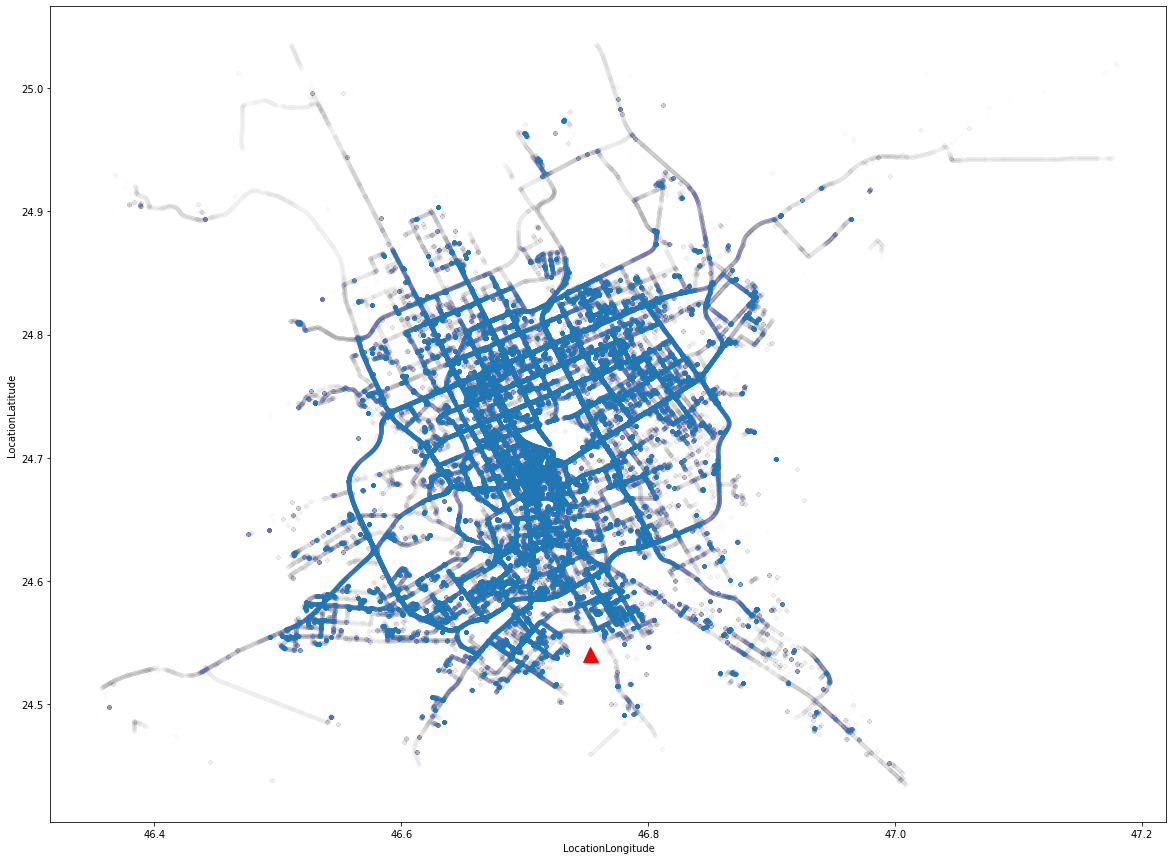

In [23]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [24]:
RSRP_data_invalid.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
1765379        2019-11-03 20:28:01+00:00         24.610826          46.685170   
2503225 2019-11-04 09:19:30.032000+00:00         24.719664          46.822470   
2505323 2019-11-04 14:10:59.026000+00:00         24.807577          46.778990   
1516943        2019-11-03 13:33:48+00:00         24.687710          46.672874   
2528769        2019-11-04 14:38:09+00:00         24.808966          46.516964   
2067436 2019-11-03 13:38:34.033000+00:00         24.805964          46.774773   
2117475 2019-11-04 04:26:12.857000+00:00         24.679482          46.661346   
389676  2019-11-02 10:28:08.999000+00:00         24.653730          46.750523   
2502840 2019-11-04 08:58:53.018000+00:00         24.826649          46.796207   
1523140        2019-11-03 20:39:44+00:00         24.613876          46.682213   
1085565 2019-11-03 05:46:57.048000+00:00         24.805721          46.788216   
2287809        2019-11-03 17:27:29+00:00         24.592161          46.739155   
2073058 2019-11-03 19:22:06.031000+00:00         24.834576          46.831580   
1224332 2019-11-02 21:53:25.015000+00:00         24.831415          46.848180   
1157808 2019-11-03 15:30:37.034000+00:00         24.570490          46.612500   
1030266        2019-11-02 13:56:28+00:00         24.581575          46.601273   
638160  2019-11-02 16:24:05.019000+00:00         24.603235          46.718914   
1377340 2019-11-03 07:50:09.025000+00:00         24.705423          46.815388   
2714015 2019-11-02 06:01:14.764000+00:00         24.580688          46.761400   
642967  2019-11-02 05:59:36.021000+00:00         24.812798          46.759800   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
1765379              Mobile                     3G        Operator A   
2503225              Mobile                     3G        Operator B   
2505323              Mobile                     3G        Operator B   
1516943              Mobile                     3G        Operator A   
2528769              Mobile                     3G        Operator C   
2067436              Mobile                     3G        Operator B   
2117475              Mobile                     3G        Operator A   
389676               Mobile                     4G        Operator A   
2502840              Mobile                     3G        Operator B   
1523140              Mobile                     3G        Operator A   
1085565              Mobile                     4G        Operator B   
2287809              Mobile                     3G        Operator A   
2073058              Mobile                     3G        Operator B   
1224332              Mobile                     4G        Operator C   
1157808              Mobile                     4G        Operator A   
1030266              Mobile                     3G        Operator A   
638160               Mobile                     3G        Operator B   
1377340              Mobile                     3G        Operator B   
2714015              Mobile                     3G        Operator A   
642967               Mobile                     3G        Operator B   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
1765379  2147483647                Enabled            SAMSUNG   
2503225  2147483647                Enabled            SAMSUNG   
2505323  2147483647                Enabled            SAMSUNG   
1516943  2147483647                Enabled            SAMSUNG   
2528769  2147483647                Enabled            SAMSUNG   
2067436  2147483647                Enabled            SAMSUNG   
2117475  2147483647                Enabled          PANASONIC   
389676   2147483647                Enabled            SAMSUNG   
2502840  2147483647                Enabled            SAMSUNG   
1523140  2147483647                Enabled            SAMSUNG   
1085565  2147483647                Enabled            SAMSUNG   
2287809  2147483647                E

In [25]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
ZTE                6
LAVA               6
SHARP              5
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [26]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [27]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
299812  2019-11-02 11:28:25.038000+00:00         24.833060          46.589127   
2711165 2019-11-03 13:59:50.025000+00:00         24.664232          46.732933   
2711752 2019-11-03 13:59:53.029000+00:00         24.664154          46.732986   
299788  2019-11-02 11:27:45.029000+00:00         24.827848          46.591816   
299674  2019-11-02 11:24:16.033000+00:00         24.829950          46.611980   
299661  2019-11-02 11:23:46.046000+00:00         24.832590          46.610672   
300024  2019-11-02 11:35:27.043000+00:00         24.826963          46.565037   
2711150 2019-11-03 13:58:46.028000+00:00         24.668780          46.729412   
142010  2019-11-02 11:35:15.047000+00:00         24.826845          46.564760   
141821  2019-11-02 11:25:52.052000+00:00         24.821112          46.600677   
299686  2019-11-02 11:24:48.029000+00:00         24.825106          46.609720   
141863  2019-11-02 11:27:33.090000+00:00         24.827147          46.592200   
157142  2019-11-02 11:30:09.078000+00:00         24.830435          46.575590   
141995  2019-11-02 11:34:28.044000+00:00         24.826895          46.564713   
142068  2019-11-02 14:32:01.026000+00:00         24.629517          46.716310   
9926    2019-11-02 11:29:28.036000+00:00         24.833270          46.582306   
2711746 2019-11-03 13:59:38.028000+00:00         24.664654          46.732246   
141847  2019-11-02 11:26:56.030000+00:00         24.822680          46.594475   
141796  2019-11-02 11:24:52.023000+00:00         24.824770          46.608960   
9918    2019-11-02 11:28:51.037000+00:00         24.835420          46.587660   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
299812               Mobile                     4G        Operator A     0   
2711165              Mobile                     4G        Operator A     0   
2711752              Mobile                     4G        Operator A     0   
299788               Mobile                     4G        Operator A     0   
299674               Mobile                     4G        Operator A     0   
299661               Mobile                     4G        Operator A     0   
300024               Mobile                     4G        Operator A     0   
2711150              Mobile                     4G        Operator A     0   
142010               Mobile                     4G        Operator A     0   
141821               Mobile                     4G        Operator A     0   
299686               Mobile                     4G        Operator A     0   
141863               Mobile                     4G        Operator A     0   
157142               Mobile                     4G        Operator A     0   
141995               Mobile                     4G        Operator A     0   
142068               Mobile                     4G        Operator A     0   
9926                 Mobile                     4G        Operator A     0   
2711746              Mobile                     4G        Operator A     0   
141847               Mobile                     4G        Operator A     0   
141796               Mobile                     4G        Operator A     0   
9918                 Mobile                     4G        Operator A     0   

        RadioMobileDataEnabled DeviceManufacturer DeviceName  
299812                 Enabled             HUAWEI       Y6Ii  
2711165                Enabled             HUAWEI       Y6Ii  
2711752                Enabled             HUAWEI       Y6Ii  
299788                 Enabled             HUAWEI       Y6Ii  
299674                 Enabled             HUAWEI       Y6Ii  
299661                 Enabled             HUAWEI       Y6Ii  
300024                 Enabled             HUAWEI       Y6Ii  
2711150                Enabled             HUAWEI       Y6Ii  
142010                 Enabled             HUAWEI       Y6Ii  
141821                 Enabled             HUAWEI       Y6Ii

Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [28]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    1009
Name: DeviceName, dtype: int64

In [29]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    429
Name: DeviceName, dtype: int64

In [30]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI    455
Name: DeviceManufacturer, dtype: int64

We can see that this an issue onlt happening with HUAWEI devices and especially the model Y6li

In [31]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
P20Pro                   1
P20 Pro                  1
Z6 Pro                   1
Z6                       1
Redmi Note 8 Pro         1
Name: DeviceName, Length: 255, dtype: int64

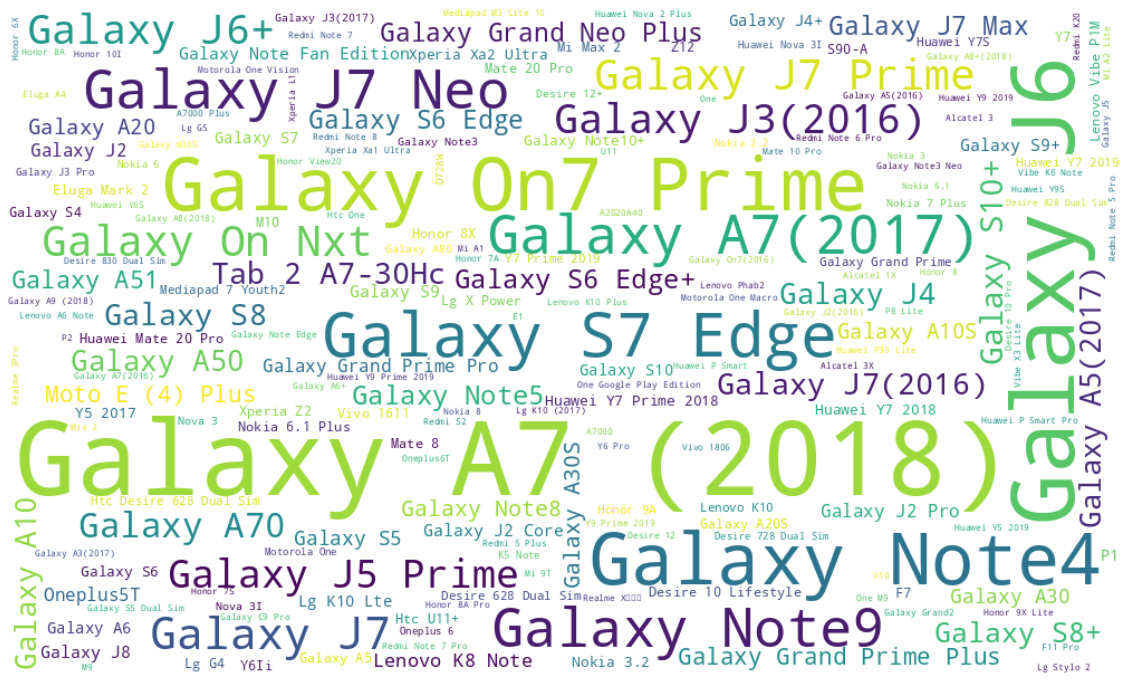

In [32]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Plotting:
We should plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [33]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data_time_sorted = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data_time_sorted.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0 2019-11-01 18:15:32.097000+00:00         24.639421           46.73017   
1 2019-11-01 18:15:32.505000+00:00         24.639421           46.73017   
2 2019-11-01 18:15:50.376000+00:00         24.639421           46.73017   
3 2019-11-01 18:20:11.389000+00:00         24.639421           46.73017   
4 2019-11-01 18:20:12.035000+00:00         24.639421           46.73017   
5 2019-11-01 18:20:13.264000+00:00         24.639421           46.73017   
6 2019-11-01 18:20:16.996000+00:00         24.639421           46.73017   
7 2019-11-01 18:21:45.695000+00:00         24.639421           46.73017   
8 2019-11-01 18:22:37.206000+00:00         24.639421           46.73017   
9 2019-11-01 18:36:43.521000+00:00         24.626589           46.68925   

  RadioConnectionType RadioNetworkGeneration RadioOperatorName        RSRP  \
0              Mobile                     4G        Operator B        -110   
1              Mobile                     4G        Operator B        -106   
2              Mobile                     4G        Operator B         -93   
3              Mobile                     4G        Operator B        -107   
4              Mobile                     4G        Operator B        -111   
5              Mobile                     4G        Operator B        -106   
6              Mobile                     3G        Operator B  2147483647   
7              Mobile                     3G        Operator B  2147483647   
8              Mobile                     4G        Operator B         -98   
9              Mobile                     4G        Operator C         -95   

  RadioMobileDataEnabled DeviceManufacturer               DeviceName  
0                Enabled            SAMSUNG           Galaxy S7 Edge  
1                Enabled            SAMSUNG           Galaxy S7 Edge  
2                Enabled            SAMSUNG           Galaxy S7 Edge  
3                Enabled            SAMSUNG           Galaxy S7 Edge  
4                Enabled            SAMSUNG           Galaxy S7 Edge  
5                Enabled            SAMSUNG           Galaxy S7 Edge  
6                Enabled            SAMSUNG           Galaxy S7 Edge  
7                Enabled            SAMSUNG           Galaxy S7 Edge  
8                Enabled            SAMSUNG           Galaxy S7 Edge  
9                Enabled            SAMSUNG  Galaxy Grand Prime Plus

In [34]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [35]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data_houred, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# users_points_downsampled = datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * users_points_downsampled

# plot = RSRP_data_houred.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def operator_map(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    if (len(df_operator) == 0 ):
        return esri
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"])
    rastered = rasterize(operator_points).opts(cmap=COLORS[operator_name], cnorm="eq_hist",  width=1000, height=700)
    operator_highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * rastered * operator_highlight
    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

Column
    [0] RadioButtonGroup(options=['Operator A', ...], value='Operator A')
    [1] ParamFunction(function)

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [36]:
esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
color_key ={"Operator A":"red", "Operator B": "green", "Operator C": "blue"}

points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri  * rastered * highlight 

:DynamicMap   []
   :Overlay
      .Tiles.I  :Tiles   [Longtitude,Latitude]
      .Image.I  :Image   [LocationLongitude,LocationLatitude]   (LocationLongitude_LocationLatitude Count)
      .Points.I :Points   [LocationLongitude,LocationLatitude]   (Timestamp,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName)

This is a plot of the whole dataset we have for all the operators over the whole period we have.

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [37]:
RSRP_data.to_parquet("RSRP_data.parq")
RSRP_data_time_sorted.to_parquet("RSRP_data_time_sorted.parq")